<a href="https://colab.research.google.com/github/Tisks/Covid-Big-Data/blob/master/Data_nacional_grafico_barras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def rango_edades(df,x):
  categoria = list(df[x].drop_duplicates())
  rango=[]
  for elem in categoria:
    elem = elem.replace(' años','')
    elem = elem.replace('Enfermedad ','')
    elem = elem.replace('crónica','')
    rango.append(elem)
  return rango

In [18]:
def graficar_param2(csv,titulo,agrupar_por,grupo1,nombre_grupo1,grupo2,nombre_grupo2,eje_x,titulo_x,titulo_y):
  df=pd.read_csv(csv, sep= ',')
  #Se obtiene la ultima fecha que tiene el df
  Fecha_actual= list(df.columns)[-1]
  #Generar un Data Frame que saque la informacion segun grupo etario, sexo y la ultima fecha.
  df_acotado = (df[[eje_x, agrupar_por, Fecha_actual]]).dropna()
  #Se pueden generar 2 df; con la data de hombres y de mujeres
  df_g1 = df_acotado.groupby(agrupar_por).get_group(grupo1).drop([agrupar_por], axis=1)
  df_g2 = df_acotado.groupby(agrupar_por).get_group(grupo2).drop([agrupar_por], axis=1)
  #Luego, de estos df, se obtienen las listas con los valores segun su Sexo
  g1 = list(df_g1[Fecha_actual])
  g2 = list(df_g2[Fecha_actual])
  
  rango= rango_edades(df_acotado,eje_x)
  x = np.arange(len(rango))
  fig = plt.figure(figsize =(15,5))

  ax = fig.add_axes([0,0,1,1])


  ax.bar(x - 0.17, g1, color = 'c', width = 0.35)
  ax.bar(x + 0.17, g2, color = 'm', width = 0.35)

  ax.legend(labels=[nombre_grupo1, nombre_grupo2],fontsize=12)

  ax.set_xticks(x)
  ax.set_xticklabels(rango)
  ax.set_title(titulo ,fontsize=20)
  ax.set_xlabel(titulo_x,fontsize=15)
  ax.set_ylabel(titulo_y,fontsize=15)
  #ax.bar(rango,f)
  plt.show()

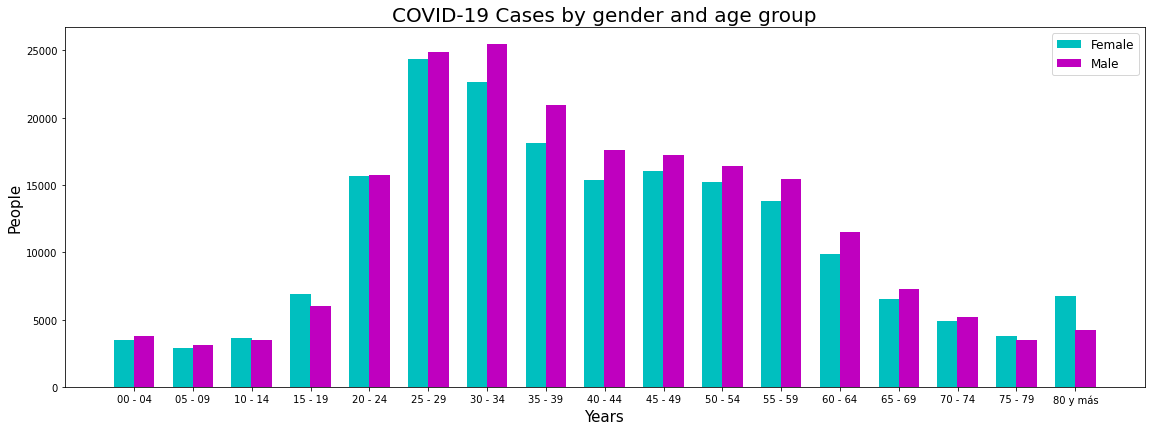

In [17]:
graficar_param2('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario.csv','COVID-19 Cases by gender and age group','Sexo','F','Female','M','Male','Grupo de edad','Years','People')

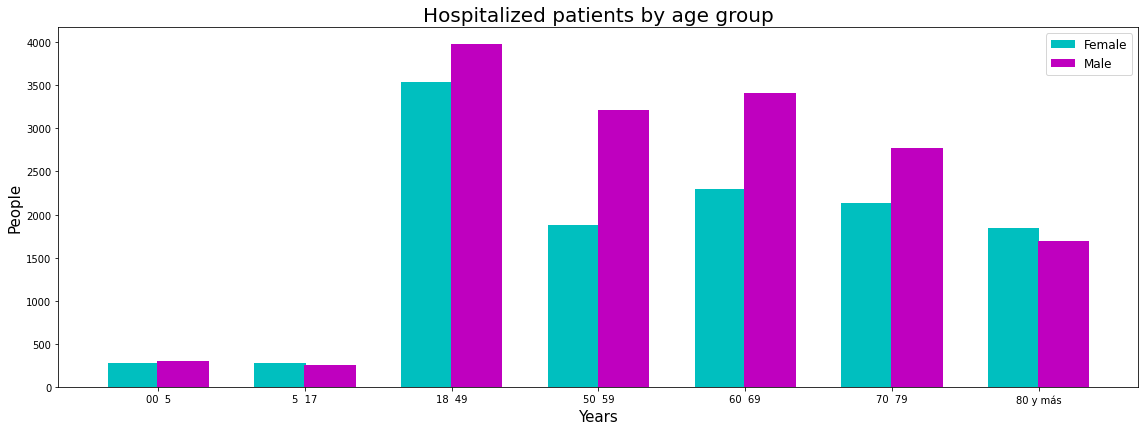

In [16]:
graficar_param2('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto22/HospitalizadosEtario_Acumulado.csv','Hospitalized patients by age group','Sexo','F','Female','M','Male','Grupo de edad','Years','People')

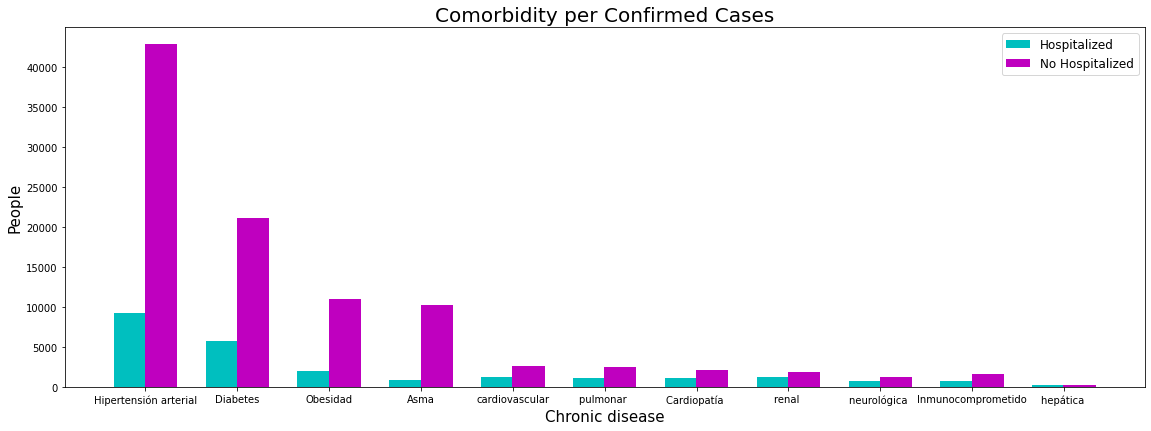

In [15]:
graficar_param2('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto35/Comorbilidad.csv', 'Comorbidity per Confirmed Cases','Hospitalización','SI','Hospitalized','NO','No Hospitalized','Comorbilidad','Chronic disease','People')

In [13]:
def graficar_etario(csv,nombre_grafico):
  df=pd.read_csv(csv, sep= ',')
  #Se obtiene la ultima fecha que tiene el df
  Fecha_actual= list(df.columns)[-1]
  #Generar un Data Frame que saque la informacion segun grupo etario, sexo y la ultima fecha.
  df_acotado = df[['Grupo de edad', Fecha_actual]]
  m = list(df_acotado[Fecha_actual])
  rango= list(df_acotado['Grupo de edad'])
  x = np.arange(len(rango))
  fig = plt.figure(figsize =(10,5))
  ax = fig.add_axes([0,0,1,1])
  ax.bar(x, m, color = 'm')
  ax.set_xticks(x)
  ax.set_xticklabels(rango)
  ax.set_title(nombre_grafico ,fontsize=20)
  ax.set_xlabel('Years',fontsize=15)
  ax.set_ylabel('People',fontsize=15)
  #ax.bar(rango,f)
  plt.show()


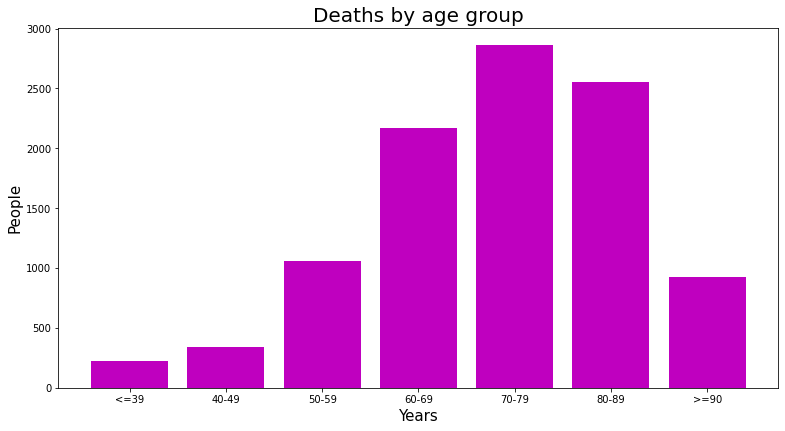

In [14]:
graficar_etario('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv','Deaths by age group')